# Twitter Sentiment Analysis of any Twitter Handle or Hashtag


# Problem Statement Description: 
Problem Description: Your task is to develop an AI system capable of performing sentiment analysis on the tweets of any given Twitter handle or associated with a specific hashtag. The system should be able to analyze the text of the tweets, categorize them as positive, negative, or neutral, and provide an overall sentiment distribution.

Input: Tweets from a specific Twitter handle or associated with a specific hashtag. The system should be designed to handle a large volume of tweets and diverse language use, including slang, abbreviations, and emojis.

Output: Percentage distribution of positive, negative, and neutral sentiments among the analyzed tweets. The system should provide a clear breakdown of the sentiment distribution, offering insights into the overall sentiment associated with the given Twitter handle or hashtag.

In [1]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.support.ui import WebDriverWait
from bs4 import BeautifulSoup
import pandas as pd
import time

In [45]:
#Starts the driver and goes to our starting webpage
driver = webdriver.Chrome()
driver.get('https://twitter.com/i/flow/login')
time.sleep(2)

In [46]:
#Variable that contains the celebirty or profile our program will scrape
#This program will scrape Narendra Modi tweets as indicated in the line below
celebrity = 'Narendra Modi'

In [47]:
#inputs an email and password for the login details
login = driver.find_element(By.XPATH, '//*[@id="layers"]/div/div/div/div/div/div/div[2]/div[2]/div/div/div[2]/div[2]/div/div/div/div[5]/label/div/div[2]/div/input')
login.send_keys('skskhan120')
login.send_keys(Keys.ENTER)
time.sleep(2)

In [48]:
password = driver.find_element(By.XPATH, '//*[@id="layers"]/div/div/div/div/div/div/div[2]/div[2]/div/div/div[2]/div[2]/div[1]/div/div/div[3]/div/label/div/div[2]/div[1]/input')
password.send_keys('Hacker@123')
time.sleep(2)
#Presses the login button, and creates a wait time to let the home page fully load in
#if your getting an error here just make your browser full screenv[2, it should work then
loginButton = driver.find_element(By.XPATH, '//*[@id="layers"]/div/div/div/div/div/div/div[2]/div[2]/div/div/div[2]/div[2]/div[2]/div/div[1]/div/div/div/div').click()

In [39]:
#inputs the name from the celebrity variable into the search box and presses enter
search = driver.find_element(By.XPATH, '//*[@id="react-root"]/div/div/div[2]/main/div/div/div/div[2]/div/div[2]/div/div/div/div[1]/div/div/div/form/div[1]/div/div/div/label/div[2]/div/input')
search.send_keys(celebrity)
search.send_keys(Keys.ENTER)
time.sleep(2)

In [40]:
#Clicks on the people tab which has all the accounts associated with who we searched up
if '#' in celebrity:
    pass
else:
    peopleButton = driver.find_element(By.XPATH, '//*[@id="react-root"]/div/div/div[2]/main/div/div/div/div[1]/div/div[1]/div[1]/div[2]/nav/div/div[2]/div/div[3]/a/div/div/span').click()
    time.sleep(2)

In [9]:
#clicks on our celebrities profile
profile = driver.find_element(By.XPATH, '//*[@id="react-root"]/div/div/div[2]/main/div/div/div/div[1]/div/div[3]/section/div/div/div/div/div[1]/div/div/div/div/div[2]/div/div[1]/div/div[1]/a/div/div[1]/span/span[1]').click()
time.sleep(2)

In [10]:
#Imports the HTML of the celebrities profile into python
soup = BeautifulSoup(driver.page_source, 'lxml')

#grabs the HTML of each tweet
postings = soup.find_all('div', class_ = 'css-901oao r-1nao33i r-37j5jr r-a023e6 r-16dba41 r-rjixqe r-bcqeeo r-bnwqim r-qvutc0')


In [11]:
#This loop will keep scrolling down the webpage loading in and collecting new tweets until we have scraped 100 unique tweets
tweets = []
while True:
    for post in postings:
        tweets.append(post.text)
    driver.execute_script('window.scrollTo(0, document.body.scrollHeight)')
    time.sleep(1)
    soup = BeautifulSoup(driver.page_source, 'lxml')
    postings = soup.find_all('div', class_ = 'css-901oao r-1nao33i r-37j5jr r-a023e6 r-16dba41 r-rjixqe r-bcqeeo r-bnwqim r-qvutc0')
    tweets2 = list(set(tweets))
    if len(tweets2)>100:
        break

In [13]:
# To Store whole extracted tweets in csv file using dataframe
df = pd.DataFrame({'Tweets':['']})
for tweet in tweets2:
    df = df.append({'Tweets':tweet}, ignore_index=True)

C:\Users\Saurav Singh\AppData\Local\Temp\ipykernel_13584\3282246461.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Tweets':tweet}, ignore_index=True)
C:\Users\Saurav Singh\AppData\Local\Temp\ipykernel_13584\3282246461.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Tweets':tweet}, ignore_index=True)
C:\Users\Saurav Singh\AppData\Local\Temp\ipykernel_13584\3282246461.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Tweets':tweet}, ignore_index=True)
C:\Users\Saurav Singh\AppData\Local\Temp\ipykernel_13584\3282246461.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.

C:\Users\Saurav Singh\AppData\Local\Temp\ipykernel_13584\3282246461.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Tweets':tweet}, ignore_index=True)
C:\Users\Saurav Singh\AppData\Local\Temp\ipykernel_13584\3282246461.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Tweets':tweet}, ignore_index=True)
C:\Users\Saurav Singh\AppData\Local\Temp\ipykernel_13584\3282246461.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Tweets':tweet}, ignore_index=True)
C:\Users\Saurav Singh\AppData\Local\Temp\ipykernel_13584\3282246461.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.

In [14]:
#exports the data as a csv
df.to_csv(f'D:\\Twitter Sentiment Analysis\\csv\\{celebrity}.csv')

# Automation of tweets scraping

In [76]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.support.ui import WebDriverWait
from bs4 import BeautifulSoup
import pandas as pd
import time
import tkinter as tk
from tkinter import messagebox

def submit():
    celebrity = entry_name.get()
    number_tweets = int(no_of_tweets.get())
    window.destroy()
    
    driver = webdriver.Chrome()
    driver.get('https://twitter.com/i/flow/login')
    time.sleep(2)
    
    login = driver.find_element(By.XPATH, '//*[@id="layers"]/div/div/div/div/div/div/div[2]/div[2]/div/div/div[2]/div[2]/div/div/div/div[5]/label/div/div[2]/div/input')
    login.send_keys('skskhan120')
    login.send_keys(Keys.ENTER)
    time.sleep(2)
    
    password = driver.find_element(By.XPATH, '//*[@id="layers"]/div/div/div/div/div/div/div[2]/div[2]/div/div/div[2]/div[2]/div[1]/div/div/div[3]/div/label/div/div[2]/div[1]/input')
    password.send_keys('Hacker@123')
    time.sleep(2)
    loginButton = driver.find_element(By.XPATH, '//*[@id="layers"]/div/div/div/div/div/div/div[2]/div[2]/div/div/div[2]/div[2]/div[2]/div/div[1]/div/div/div/div').click()
    time.sleep(4)
    search = driver.find_element(By.XPATH, '//*[@id="react-root"]/div/div/div[2]/main/div/div/div/div[2]/div/div[2]/div/div/div/div[1]/div/div/div/form/div[1]/div/div/div/label/div[2]/div/input')
    search.send_keys(celebrity)
    search.send_keys(Keys.ENTER)
    time.sleep(2)
    
    if '#' in celebrity:
        pass
    else:
        peopleButton = driver.find_element(By.XPATH, '//*[@id="react-root"]/div/div/div[2]/main/div/div/div/div[1]/div/div[1]/div[1]/div[2]/nav/div/div[2]/div/div[3]/a/div/div/span').click()
        time.sleep(2)
    
    profile = driver.find_element(By.XPATH, '//*[@id="react-root"]/div/div/div[2]/main/div/div/div/div[1]/div/div[3]/section/div/div/div/div/div[1]/div/div/div/div/div[2]/div/div[1]/div/div[1]/a/div/div[1]/span/span[1]').click()
    time.sleep(2)
    
    soup = BeautifulSoup(driver.page_source, 'lxml')
    postings = soup.find_all('div', class_ = 'css-901oao r-1nao33i r-37j5jr r-a023e6 r-16dba41 r-rjixqe r-bcqeeo r-bnwqim r-qvutc0')
    
    tweets = []
    while True:
        for post in postings:
            tweets.append(post.text)
        driver.execute_script('window.scrollTo(0, document.body.scrollHeight)')
        time.sleep(1)
        soup = BeautifulSoup(driver.page_source, 'lxml')
        postings = soup.find_all('div', class_ = 'css-901oao r-1nao33i r-37j5jr r-a023e6 r-16dba41 r-rjixqe r-bcqeeo r-bnwqim r-qvutc0')
        tweets2 = list(set(tweets))
        if len(tweets2)>number_tweets:
            break
    
    df = pd.DataFrame({'Tweets':['']})
    for tweet in tweets2:
        df = df.append({'Tweets':tweet}, ignore_index=True)
    
    messagebox.showinfo("Notification", "Tweets Fetching Completed")
    
window = tk.Tk()
window.title("Twitter Tweets Search")

# Calculate the screen width and height
screen_width = window.winfo_screenwidth()
screen_height = window.winfo_screenheight()

# Set the size of the popup window to 80% of the screen
popup_width = int(screen_width * 0.5)
popup_height = int(screen_height * 0.3)

# Center the window on the screen
x_position = int((screen_width - popup_width) / 2)
y_position = int((screen_height - popup_height) / 2)

# Set the window dimensions and position
window.geometry(f"{popup_width}x{popup_height}+{x_position}+{y_position}")

# Create labels and entry fields for job role, location, and email
label_handle = tk.Label(window, text="Handle or HashTags")
label_handle.pack()
entry_name = tk.Entry(window, width=60)
entry_name.pack()

label_length = tk.Label(window, text="Number of Tweets")
label_length.pack()
no_of_tweets = tk.Entry(window, width=60)
no_of_tweets.pack()
# Create a submit button
submit_button = tk.Button(window, text="Submit", command=submit)
submit_button.pack()

# Start the main GUI loop
window.mainloop()


C:\Users\Saurav Singh\AppData\Local\Temp\ipykernel_13584\3861476434.py:62: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Tweets':tweet}, ignore_index=True)
C:\Users\Saurav Singh\AppData\Local\Temp\ipykernel_13584\3861476434.py:62: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Tweets':tweet}, ignore_index=True)
C:\Users\Saurav Singh\AppData\Local\Temp\ipykernel_13584\3861476434.py:62: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Tweets':tweet}, ignore_index=True)
C:\Users\Saurav Singh\AppData\Local\Temp\ipykernel_13584\3861476434.py:62: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =

In [75]:
df.head()

,Tweets,Sentiment
0,,neutral
1,This will make every Indian happy. Grateful to...,positive
2,BRS Government specialises in 4 things:\n\nAbu...,negative
3,బిఆర్ఎస్ ప్రభుత్వం నాలుగు విషయాలలో ప్రత్యేక నై...,neutral
4,Attended the Defence Investiture Ceremony at R...,positive


In [51]:
!pip install textblob

                                              0.0/636.8 kB ? eta -:--:--
     -                                        30.7/636.8 kB ? eta -:--:--
     ----------------                       276.5/636.8 kB 3.4 MB/s eta 0:00:01
     --------------------                   337.9/636.8 kB 4.2 MB/s eta 0:00:01
     -------------------------------        532.5/636.8 kB 3.7 MB/s eta 0:00:01
     -------------------------------------- 636.8/636.8 kB 3.3 MB/s eta 0:00:00
                                              0.0/1.5 MB ? eta -:--:--
     ----                                     0.2/1.5 MB 5.1 MB/s eta 0:00:01
     ---------                                0.4/1.5 MB 4.4 MB/s eta 0:00:01
     ----------------                         0.6/1.5 MB 5.0 MB/s eta 0:00:01
     -------------------------                1.0/1.5 MB 6.1 MB/s eta 0:00:01
     -------------------------------          1.2/1.5 MB 5.4 MB/s eta 0:00:01
     -----------------------------------      1.3/1.5 MB 5.0 MB/s eta 0:

In [65]:
from textblob import TextBlob
import re

In [77]:
def analyze_sentiment(tweet_text):
    # Remove emojis from the text as they don't provide meaningful sentiment information
    cleaned_text = ' '.join(re.sub(r':', '', tweet_text).split())
    
    # Perform sentiment analysis
    analysis = TextBlob(cleaned_text)
    sentiment_score = analysis.sentiment.polarity
    
    if sentiment_score > 0:
        return 'positive'
    elif sentiment_score < 0:
        return 'negative'
    else:
        return 'neutral'

# Perform sentiment analysis on the tweets in the DataFrame
df['Sentiment'] = df['Tweets'].apply(analyze_sentiment)

In [78]:
# Calculate the sentiment distribution
sentiment_distribution = df['Sentiment'].value_counts(normalize=True) * 100

# Output the results
print("Percentage distribution of sentiments:")
print("Positive: {:.2f}%".format(sentiment_distribution['positive']))
print("Negative: {:.2f}%".format(sentiment_distribution['negative']))
print("Neutral: {:.2f}%".format(sentiment_distribution['neutral']))


Percentage distribution of sentiments:
Positive: 48.11%
Negative: 2.83%
Neutral: 49.06%


In [58]:
!pip install matplotlib


In [68]:
import matplotlib.pyplot as plt

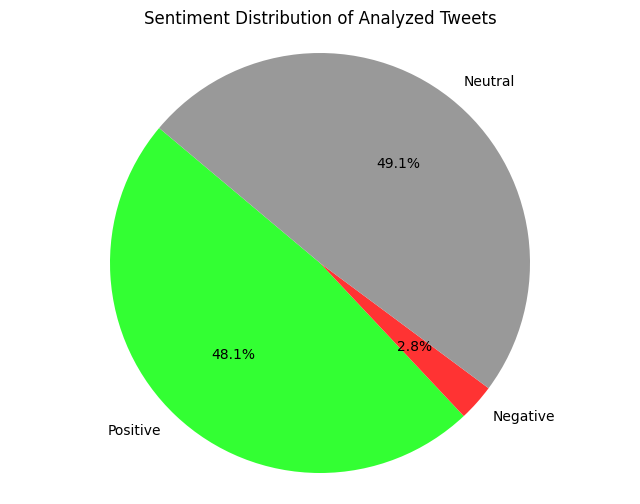

In [79]:
# Data for sentiment distribution
labels = ['Positive', 'Negative', 'Neutral']
sizes = [sentiment_distribution['positive'], sentiment_distribution['negative'], sentiment_distribution['neutral']]
colors = ['#33ff33', '#ff3333', '#999999']  # Green for positive, Red for negative, Gray for neutral

# Create the pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)

# Add a title
plt.title('Sentiment Distribution of Analyzed Tweets')

# Display the pie chart
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular
plt.show()
